In [1]:
import cv2
from src.estimate_watermark import *
from src.preprocess import *
from src.image_crawler import *
from src.watermark_reconstruct import *

import time
start = time.clock()

# 调用estimate_watermark中的estimate_watermark函数
# gx,gy:中间梯度 gxlist,gylist:梯度列表
gx, gy, gxlist, gylist = estimate_watermark('train/watermarked')
# print(gx[78:280,189:309,:])

E:\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
  


Computing gradients.
Computing median gradients.


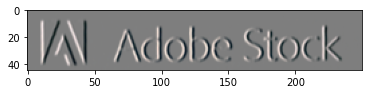

In [18]:
sx=55
ex=100
sy=20
ey=270
lx=ex-sx
ly=ey-sy
cropped_gx = gx[sx:ex,sy:ey,:]
cropped_gy = gy[sx:ex,sy:ey,:]
plt.imshow(PlotImage(cropped_gx))
plt.draw()

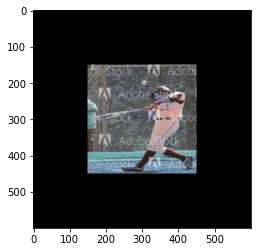

In [19]:
z = np.zeros([600,600,3])
im = np.zeros([600,600,3]).astype( np.uint8 )
img = cv2.imread('full/watermarked/1.png')
im[150:450,150:450] = img[0:300,0:300]

plt.imshow(PlotImage(im))
plt.show()

In [20]:
num_w = 8
s = []
l = []
sn = 0

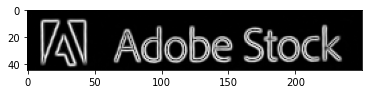

img_edgemap in watermark_detector


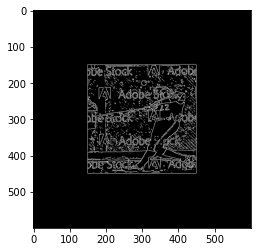

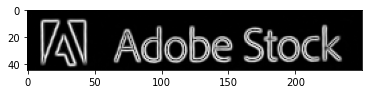

img_edgemap in watermark_detector


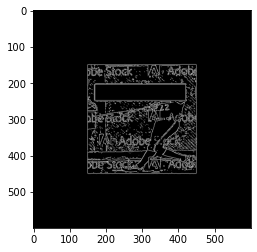

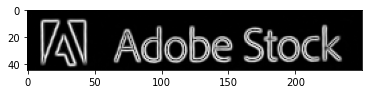

img_edgemap in watermark_detector


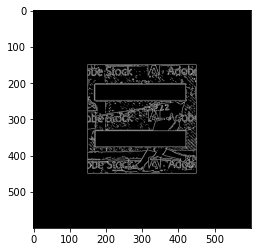

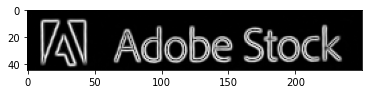

img_edgemap in watermark_detector


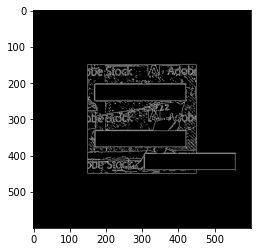

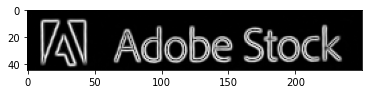

img_edgemap in watermark_detector


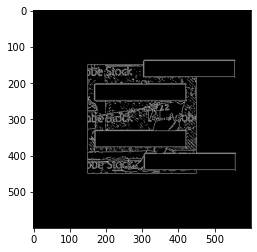

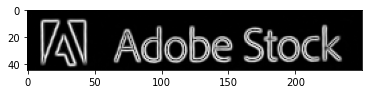

img_edgemap in watermark_detector


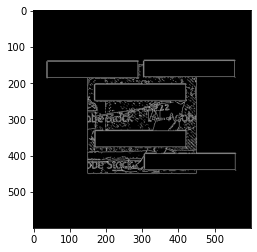

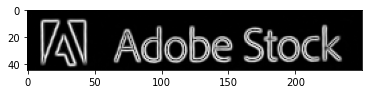

img_edgemap in watermark_detector


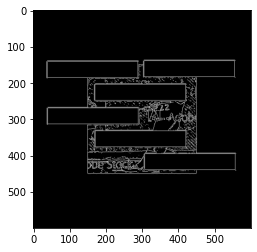

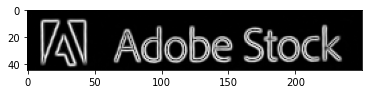

img_edgemap in watermark_detector


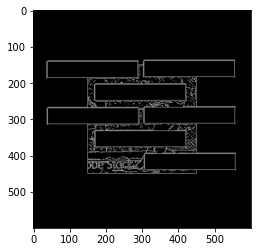

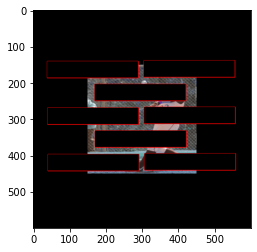

[(204, 170), (332, 171), (395, 307), (139, 305), (141, 39), (269, 40), (267, 306), (397, 41)]
[(45, 250), (45, 250), (45, 250), (45, 250), (45, 250), (45, 250), (45, 250), (45, 250)]


In [21]:
for i in range(8):
    im, s1, l1 = watermark_detector(im, cropped_gx, cropped_gy)
    s.append(s1)
    l.append(l1)
    im[s[i][0]:s[i][0]+l[i][0],s[i][1]:s[i][1]+l[i][1]] = z[s[i][0]:s[i][0]+l[i][0],s[i][1]:s[i][1]+l[i][1]]
plt.imshow(im)
plt.show()
print(s)
print(l)

In [22]:
num_images = len(gxlist)
print("num_images =",num_images)
# # 调用watermark_reconstruct中的get_cropped_images函数
# # This is the part where we get all the images, extract their parts, and then add it to our matrix
# # 把图片裁剪成水印的大小
J,file_names = get_cropped_images(
    'full/watermarked', num_images, 2, s, l, cropped_gx.shape)

num_images = 350


Computing gradients.
Computing median gradients.


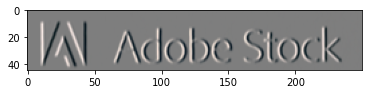

In [23]:
print("Computing gradients.")
gradx = list(map(lambda x: cv2.Sobel(x, cv2.CV_64F, 1, 0, ksize=KERNEL_SIZE), J))
grady = list(map(lambda x: cv2.Sobel(x, cv2.CV_64F, 0, 1, ksize=KERNEL_SIZE), J))

# Compute median of grads
print("Computing median gradients.")
Wm_x = np.median(np.array(gradx), axis=0)
Wm_y = np.median(np.array(grady), axis=0)

plt.imshow(PlotImage(Wm_x))
plt.draw()

In poisson_reconstruct...
laplacian.shape
(45, 250, 3)


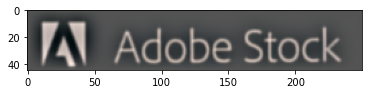

In [24]:
# 调用estimate_watermark中的poisson_reconstruct函数 泊松重建
# W_m = poisson_reconstruct(cropped_gx, cropped_gy)
W_m = poisson_reconstruct(Wm_x, Wm_y)

plt.imshow(PlotImage(W_m))
plt.show()

In [25]:



# Wm = (255*PlotImage(W_m))
Wm = W_m - W_m.min()   #这是啥？


In [26]:
# get threshold of W_m for alpha matte estimate
alph_est = estimate_normalized_alpha(J, Wm, num_images*2)
alph = np.stack([alph_est, alph_est, alph_est], axis=2)

Estimating normalized alpha using 700 images.
estimate_normalized_alpha0
estimate_normalized_alpha1
estimate_normalized_alpha2
estimate_normalized_alpha3
estimate_normalized_alpha4
estimate_normalized_alpha5
estimate_normalized_alpha6
estimate_normalized_alpha7
estimate_normalized_alpha8
estimate_normalized_alpha9
estimate_normalized_alpha10
estimate_normalized_alpha11
estimate_normalized_alpha12
estimate_normalized_alpha13
estimate_normalized_alpha14
estimate_normalized_alpha15
estimate_normalized_alpha16
estimate_normalized_alpha17
estimate_normalized_alpha18
estimate_normalized_alpha19
estimate_normalized_alpha20
estimate_normalized_alpha21
estimate_normalized_alpha22
estimate_normalized_alpha23
estimate_normalized_alpha24
estimate_normalized_alpha25
estimate_normalized_alpha26
estimate_normalized_alpha27
estimate_normalized_alpha28
estimate_normalized_alpha29
estimate_normalized_alpha30
estimate_normalized_alpha31
estimate_normalized_alpha32
estimate_normalized_alpha33
estimate_nor

estimate_normalized_alpha285
estimate_normalized_alpha286
estimate_normalized_alpha287
estimate_normalized_alpha288
estimate_normalized_alpha289
estimate_normalized_alpha290
estimate_normalized_alpha291
estimate_normalized_alpha292
estimate_normalized_alpha293
estimate_normalized_alpha294
estimate_normalized_alpha295
estimate_normalized_alpha296
estimate_normalized_alpha297
estimate_normalized_alpha298
estimate_normalized_alpha299
estimate_normalized_alpha300
estimate_normalized_alpha301
estimate_normalized_alpha302
estimate_normalized_alpha303
estimate_normalized_alpha304
estimate_normalized_alpha305
estimate_normalized_alpha306
estimate_normalized_alpha307
estimate_normalized_alpha308
estimate_normalized_alpha309
estimate_normalized_alpha310
estimate_normalized_alpha311
estimate_normalized_alpha312
estimate_normalized_alpha313
estimate_normalized_alpha314
estimate_normalized_alpha315
estimate_normalized_alpha316
estimate_normalized_alpha317
estimate_normalized_alpha318
estimate_norma

estimate_normalized_alpha568
estimate_normalized_alpha569
estimate_normalized_alpha570
estimate_normalized_alpha571
estimate_normalized_alpha572
estimate_normalized_alpha573
estimate_normalized_alpha574
estimate_normalized_alpha575
estimate_normalized_alpha576
estimate_normalized_alpha577
estimate_normalized_alpha578
estimate_normalized_alpha579
estimate_normalized_alpha580
estimate_normalized_alpha581
estimate_normalized_alpha582
estimate_normalized_alpha583
estimate_normalized_alpha584
estimate_normalized_alpha585
estimate_normalized_alpha586
estimate_normalized_alpha587
estimate_normalized_alpha588
estimate_normalized_alpha589
estimate_normalized_alpha590
estimate_normalized_alpha591
estimate_normalized_alpha592
estimate_normalized_alpha593
estimate_normalized_alpha594
estimate_normalized_alpha595
estimate_normalized_alpha596
estimate_normalized_alpha597
estimate_normalized_alpha598
estimate_normalized_alpha599
estimate_normalized_alpha600
estimate_normalized_alpha601
estimate_norma

In [27]:
# print(J-Wm)
# J与Wm维度不同，Wm扩展成4维然后相减

# 论文中的依据：Jk = E(Wm) + c · αn · E[Ik]
C, est_Ik = estimate_blend_factor(J, Wm, alph)

0.30675021030008076
0.27149616454077236
0.2545774659396401


In [28]:
alpha = alph.copy()
for i in range(3):
    alpha[:, :, i] = C[i] * alpha[:, :, i]    # α = c · αn

# W_m是泊松重建的结果；上面执行了Wm = W_m - W_m.min()
    
Wm = Wm + alpha * est_Ik      # 这里的Wm是E(Wm)，估计的水印；公式 Est(Wm) = c · αn W − c · αn E[Ik]

W = Wm.copy()
for i in range(3):
    W[:, :, i] /= C[i]      # W是真实的水印图像（不带透明度？）

# Jt = J[:25]       # 这一步是干啥？
Jt = J[:15]

# now we have the values of alpha, Wm, J
# Solve for all images
Wk, Ik, W, alpha1 = solve_images(Jt, W_m, alpha, W)
# W_m_threshold = (255*PlotImage(np.average(W_m, axis=2))).astype(np.uint8)
# ret, thr = cv2.threshold(W_m_threshold, 127, 255, cv2.THRESH_BINARY)

------------------------------------
Iteration: 0
Step 1
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
Step 2
Step 3
------------------------------------
Iteration: 1
Step 1
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
Step 2
Step 3


In [29]:
alpha1[alpha1 < 0] = 0
W[W<0] = 0

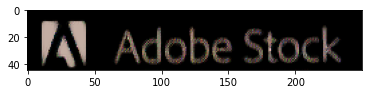

In [30]:
plt.imshow(PlotImage(alpha1)) #估计出来的α
plt.draw()

# alpha3 = alpha1.copy()
# alpha3 = cv2.GaussianBlur(alpha3, (3, 3), 0)
# plt.imshow(PlotImage(alpha3)) #估计出来的α
# plt.draw()

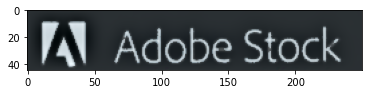

In [31]:
plt.imshow(PlotImage(W))   #估计出来的W
plt.draw()

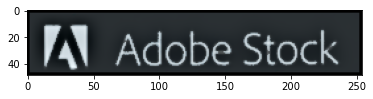

In [32]:
#------扩展W和α并保留左右各5像素边框------
bsize =2
bsize2 = 4
_shape = ((lx+bsize2),(ly+bsize2),3)

W0 = np.zeros(_shape)
W0[bsize:(lx+bsize), bsize:(ly+bsize), :] = W

alpha2 = np.zeros(_shape)
# alpha2[bsize:(lx+bsize), bsize:(ly+bsize), :] = alpha1
alpha2[bsize:(lx+bsize), bsize:(ly+bsize), :] = alpha1

cropped_gx1 = np.zeros(_shape)
cropped_gx1[bsize:(lx+bsize), bsize:(ly+bsize), :] = cropped_gx

plt.imshow(PlotImage(W0))
plt.draw()

In [33]:
test_num=10  #测试图片的数量
s_n=[]
l_n=[]
for i in range(num_w):
    s_n.append((s[i][0]-bsize,s[i][1]-bsize)) 
    l_n.append((l[i][0]+bsize2,l[i][1]+bsize2)) 
J_n,file_names = get_cropped_images(
    'full1/watermarked', test_num, 8, s_n, l_n, cropped_gx1.shape)
Wk, Ik, W2, alpha3 = get_images(J_n, W0, alpha2)

get the original images
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79


In [34]:
for i in range(test_num*num_w):
    cv2.imwrite('patch/'+str(i)+'.png',Ik[i])

In [35]:
#拼接整张图
for i in range(1,test_num+1):
    _s=s_n
    _l=l_n
    _img=cv2.imread("full1/watermarked/"+ file_names[i-1])
#     _img = cv2.imread(img_paths[i-1])
    out = np.zeros([600,600,3]).astype( np.uint8 )
    out[150:450,150:450] = _img[0:300,0:300]
    for j in range(8):    
        _mark=cv2.imread('patch/'+ str((i-1)*8+j)+'.png')
        out[_s[j][0]:(_s[j][0]+_l[j][0]), _s[j][1]:(_s[j][1]+_l[j][1])]=_mark
#         layer=Image.new('RGBA', (600,600,3), (0,0,0,0))
#         layer.paste(_mark, (600-s[i][1]-l[i][1]-bsize-3,s[i][0]-bsize))
#         out=out.pase(_mark, (600-s[i][1]-l[i][1]-bsize-3,s[i][0]-bsize))
    cv2.imwrite('result/'+ file_names[i-1],out[150:450,150:450])
    print("success: "+ str(i))
    

success: 1
success: 2
success: 3
success: 4
success: 5
success: 6
success: 7
success: 8
success: 9
success: 10


In [36]:
cv2.imwrite('result/W.png',W)
cv2.imwrite('result/alpha.png',alpha1)
cv2.imwrite('result/cropped_gx.png',cropped_gx)

True

In [37]:
f1 = open("result/s.txt", "w")
f1.write(str(s))
f1.close()

In [38]:
f2 = open("result/l.txt", "w")
f2.write(str(l))
f2.close()

In [39]:
elapsed = (time.clock() - start)
print("Time used:",elapsed)

Time used: 765.6533056000001


E:\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
  """Entry point for launching an IPython kernel.
